Course name: Natural Language Processing & Text Mining  
Course code: 472867-HS2024-0  
Project Task 1: Data Exploration & Processing

Autumn Semester 2024-2025  
Master in Artificial Intelligence for Medicine  
Universität Bern  

*Group Members: Rachel Robles (23-125-966), Corina Hüni (), Chanae Smith (23-107-915)*    


In [1]:
#pip install langdetect

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import langdetect
from datasets import load_dataset

In [3]:
ds = load_dataset("argilla/medical-domain")
train_data = ds['train']

ds

DatasetDict({
    train: Dataset({
        features: ['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics'],
        num_rows: 4966
    })
})

# **PART A - Exploring the Dataset**  
---

In [4]:
def inspect_data(data, num_samples=5):
    # Print out the full structure of dataset
    for i, item in enumerate(data[:num_samples], 1):
        print(f"Features {i}: {item}\n")

    # Print out the structure and content of the first few data entries
    for i in range(num_samples):
        sample = data[i]
        print(f"Sample {i+1}: {sample}\n")

# Run the inspection of data
inspect_data(train_data)

Features 1: text

Features 2: inputs

Features 3: prediction

Features 4: prediction_agent

Features 5: annotation

Features 6: annotation_agent

Features 7: multi_label

Features 8: explanation

Features 9: id

Features 10: metadata

Features 11: status

Features 12: event_timestamp

Features 13: metrics

Sample 1: {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:,  Diverticulosis.,PROCEDURE:,  Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice.  Preparation was good, although there was some residual material in the cecum that was difficult to clear completely.  The mucosa was normal throughout the colon.  No polyps or other lesions were identified, and no blood was noted.  Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflamm

## **A.1 - Basic Statistics**

In [5]:
# 1. Basic statistics
def basic_stats(data):
    # Number of samples
    num_samples = len(data)
    
    # Extracting unique prediction label values from the dataset
    predictions = list(item['label'] 
    for example in ds['train'] 
    for item in example['prediction'] 
    if example['prediction'] not in [None, ''])
    unique_predictions = len(set(predictions))

    # Counting the frequency of each label
    prediction_counts = Counter(predictions)
        
    # Min/avg/max length of text
    text_lengths_sent = [len(item['text'].split()) for item in data if item['text'] is not None]
    min_length_sent = np.min(text_lengths_sent)
    avg_length_sent = np.mean(text_lengths_sent)
    max_length_sent = np.max(text_lengths_sent)

    # Min/avg/max length of text in characters
    text_lengths_char = [len(item['text']) for item in data if item['text'] is not None]
    min_length_char = np.min(text_lengths_char)
    avg_length_char = np.mean(text_lengths_char)
    max_length_char = np.max(text_lengths_char)
    
    print(f"Number of samples: {num_samples}")
    print(f"Number of classes: {unique_predictions}")
    print(f"Number of samples per class: {prediction_counts}")
    print(f"Text length (# sentences) - Min: {min_length_sent}, Avg: {avg_length_sent:.1f}, Max: {max_length_sent}")
    print(f"Text length (# characters) - Min: {min_length_char}, Avg: {avg_length_char:.1f}, Max: {max_length_char}")

In [6]:
basic_stats(train_data)

Number of samples: 4966
Number of classes: 40
Number of samples per class: Counter({' Surgery': 1088, ' Consult - History and Phy.': 516, ' Cardiovascular / Pulmonary': 371, ' Orthopedic': 355, ' Radiology': 273, ' General Medicine': 259, ' Gastroenterology': 224, ' Neurology': 223, ' SOAP / Chart / Progress Notes': 166, ' Urology': 156, ' Obstetrics / Gynecology': 155, ' Discharge Summary': 108, ' ENT - Otolaryngology': 96, ' Neurosurgery': 94, ' Hematology - Oncology': 90, ' Ophthalmology': 83, ' Nephrology': 81, ' Emergency Room Reports': 75, ' Pediatrics - Neonatal': 70, ' Pain Management': 61, ' Psychiatry / Psychology': 53, ' Office Notes': 50, ' Podiatry': 47, ' Dermatology': 29, ' Dentistry': 27, ' Cosmetic / Plastic Surgery': 27, ' Letters': 23, ' Physical Medicine - Rehab': 21, ' Sleep Medicine': 20, ' Endocrinology': 19, ' Bariatrics': 18, ' IME-QME-Work Comp etc.': 16, ' Chiropractic': 14, ' Diets and Nutritions': 10, ' Rheumatology': 10, ' Speech - Language': 9, ' Lab Medi

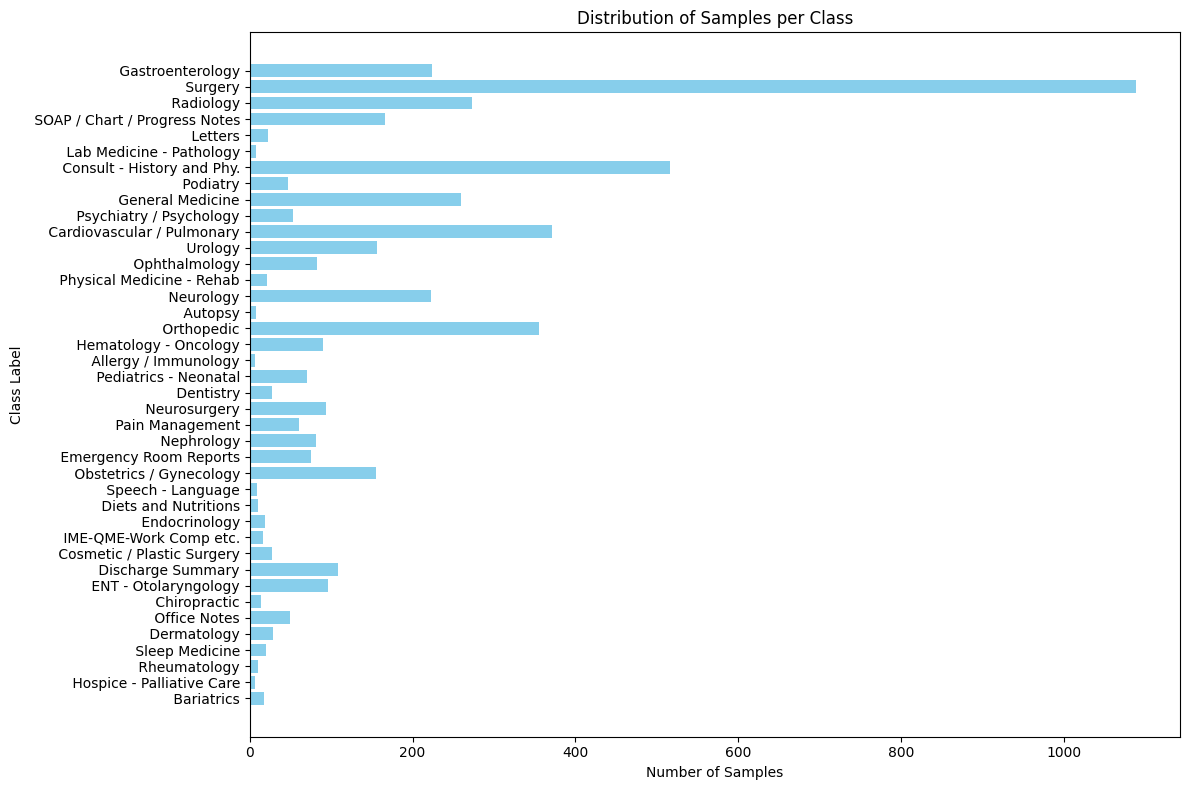

In [7]:
import matplotlib.pyplot as plt

# Count the frequency of each prediction label in the dataset
predictions = [item['label'] 
               for example in ds['train'] 
               for item in example['prediction'] 
               if example['prediction'] not in [None, '']]

# Get the count of each unique class
prediction_counts = Counter(predictions)

# Prepare data for plotting
classes = list(prediction_counts.keys())
counts = list(prediction_counts.values())

# Plotting the distribution of samples per class
plt.figure(figsize=(12, 8))
plt.barh(classes, counts, color='skyblue')
plt.xlabel('Number of Samples')
plt.ylabel('Class Label')
plt.title('Distribution of Samples per Class')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


### *Findings*

- The datatset has a total of 4,966 samples with 40 unique prediction classes in the dataset.
- The dataset is not balanced. Some classes (e.g., 'Surgery') have a significantly higher number of samples (1,088 samples), while other classes like 'Allergy / Immunology' and 'Hospice - Palliative Care' have only 7 and 6 samples respectively. This shows a skewed distribution of the samples across the classes (i.e some of the medical domains are more heavily represented compared to others).
- The length of text is also highly variable, with some documents being extremely short (a single sentence), while others are quite lengthy (>3000 sentences). 

## **A.2 - National Languages Used**

In [8]:
# 2. Determine national languages used
def detect_languages(data):
    text_data = [item['text'] for item in data if item['text'] is not None]
    
    detected_languages = [langdetect.detect(text) for text in text_data]
    language_counts = Counter(detected_languages)
    
    print(f"Top 5 detected languages: {language_counts.most_common(5)}")

In [9]:
detect_languages(train_data)

Top 5 detected languages: [('en', 4955), ('pt', 3), ('so', 2), ('de', 2), ('tl', 2)]


### *Findings*

- The top 5 detected languages are:
    - English (en): 4,954 samples.
    - Portuguese (pt): 3 samples.
    - Somali (so): 2 samples.
    - German (de): 2 samples.
    - Tagalog (tl): 2 samples.
- The vast majority of the data is in English, however, there are a few cases (less than 1%) where the text is in other languages such as Portuguese, Somali, and German. 

## **A.3 - Style, Vocabulary, Spelling**

In [10]:
# 3. Review 100+ samples for style, vocabulary, and spelling
def sample_analysis(data, num_samples=100):
    sample_texts = [item['text'] for item in data if item['text'] is not None]
    
    for i, text in enumerate(sample_texts[:num_samples], 1):
        print(f"Sample {i}:\n{text[:500]}...\n")  # Show first 500 characters for brevity

In [11]:
sample_analysis(train_data)

Sample 1:
PREOPERATIVE DIAGNOSIS:,  Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:,  Diverticulosis.,PROCEDURE:,  Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice.  Preparation was good, although there was some residual material in the cecum that was difficult to clear completely.  The mucosa was normal throughout the c...

Sample 2:
CLINICAL INDICATION:  ,Normal stress test.,PROCEDURES PERFORMED:,1.  Left heart cath.,2.  Selective coronary angiography.,3.  LV gram.,4.  Right femoral arteriogram.,5.  Mynx closure device.,PROCEDURE IN DETAIL: , The patient was explained about all the risks, benefits, and alternatives of this procedure.  The patient agreed to proceed and informed consent was signed.,Both groins were prepped and draped in the usual sterile fashion.  After local anesthesia with 2% lidoca

### *Findings*

- Style: 
    - Most of the time, the sentences are short phrases with minimal use of transition words (such as a, the, and).
    - The text also follows a formal, clinical format, often structured with headers and sections for diagnoses, procedures, patient histories, etc. 

- Vocabulary: 
    - Because of the content, the text is rich in specialized medical terms, acronyms, and jargon typical of healthcare settings, such as "biopsy," "PSA," "MAC," etc.

- Spelling: 
    - Given that medical records are completed with the goal of optimizing time spent on patients, spelling and grammar are not emphasized. This results in messy texts.

# **PART B - Processing Pipeline**  
---


In [12]:
import nltk
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK tokenizer data
nltk.download('punkt')
nltk.download('stopwords')

# Load Spacy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Initialize stemmer
stemmer = PorterStemmer()

# NLTK stopwords
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))

# Combine with sklearn stopwords
stopwords = nltk_stopwords.union(ENGLISH_STOP_WORDS)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Step 1: Read dataset
def read_dataset(dataset_name="argilla/medical-domain", split="train"):
    try:
        ds = load_dataset(dataset_name)
        if split in ds:
            return ds[split]
        else:
            raise ValueError(f"Split '{split}' not found in dataset.")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

In [14]:
# Step 2: Tokenization
def tokenize(text):
    return word_tokenize(text)

In [15]:
# Step 3: Normalization
def normalize(text, lower=True, lemmatize=True, stem=False):
    if lower:
        text = text.lower()
    if lemmatize:
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc]
    elif stem:
        tokens = [stemmer.stem(word) for word in word_tokenize(text)]
    else:
        tokens = word_tokenize(text)
    return tokens

In [16]:
# Step 4: Token filtering (stop words)
def filter_tokens(tokens, stop_words=True, min_length=2):
    if stop_words:
        tokens = [token for token in tokens if token not in stopwords and len(token) >= min_length]
    return tokens

In [17]:
# Step 5: Processing pipeline
def process_text(text, lower=True, lemmatize=True, stem=False, stop_words=True, min_length=2):
    tokens = tokenize(text)                     # Tokenization
    tokens = normalize(" ".join(tokens), lower, lemmatize, stem)  # Normalization
    tokens = filter_tokens(tokens, stop_words, min_length)  # Token filtering
    return tokens


In [18]:
# Step 6: Apply the pipeline to a dataset column
def apply_pipeline(dataset_name="argilla/medical-domain", split="train", text_column='text', lower=True, lemmatize=True, stem=False, stop_words=True, min_length=2):
    dataset = read_dataset(dataset_name, split)
    # Apply the processing pipeline to each entry in the dataset's specified text column
    def process_row(row):
        row['processed_text'] = process_text(row[text_column], lower, lemmatize, stem, stop_words, min_length)
        return row
    
    # Use the Hugging Face `map` function to apply the process_row function
    processed_dataset = dataset.map(process_row)
    return processed_dataset


In [19]:
# Example Usage
# Apply the pipeline to the dataset
processed_dataset = apply_pipeline(dataset_name="argilla/medical-domain", split="train", text_column='text', lower=True, lemmatize=True, stop_words=True)


Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

In [20]:
# Show the first few rows with the 'text' and 'processed_text' columns
for i in range(5):
    print(f"Original Text: {processed_dataset[i]['text']}")
    print(f"Processed Text: {processed_dataset[i]['processed_text']}")
    print("------")

Original Text: PREOPERATIVE DIAGNOSIS:,  Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:,  Diverticulosis.,PROCEDURE:,  Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice.  Preparation was good, although there was some residual material in the cecum that was difficult to clear completely.  The mucosa was normal throughout the colon.  No polyps or other lesions were identified, and no blood was noted.  Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflammation.  A retroflex view of the anorectal junction showed no hemorrhoids.  The patient tolerated the procedure well and was sent to the recovery room.,FINAL DIAGNOSES:,1.  Diverticulosis in the sigmoid.,2.  Otherwise normal colonoscopy to the cecum.,RECOMMENDATIONS:,1.  Follow up with Dr. X as needed.,2.  Screen

# **PART C - Term Frequency Distributions**  
---

## **C.1 - Calculate Term Frequencies for Each Class**

In [21]:
from collections import defaultdict

def calculate_term_frequency(dataset, class_column='prediction', text_column='processed_text'):
    # A dictionary to hold term frequencies for each class
    term_frequencies = defaultdict(Counter)
    
    # Iterate through the dataset
    for row in dataset:
        class_label = row[class_column][0]['label'].strip()  
        tokens = row[text_column]
        
        # Update the term frequency counter for the class
        term_frequencies[class_label].update(tokens)
    
    return term_frequencies


## **C.2 - Compare Term Frequencies Across Classes**

In [22]:
def compare_term_frequencies(term_frequencies):
    # Gather all unique terms across all classes
    all_terms = set()
    for class_label in term_frequencies:
        all_terms.update(term_frequencies[class_label].keys())
    
    # Convert the set to a list 
    all_terms = list(all_terms)
    
    # Create a comparison table
    comparison = pd.DataFrame(index=all_terms)
    
    # Fill the table with term frequencies for each class
    for class_label, freq_dict in term_frequencies.items():
        comparison[class_label] = pd.Series(freq_dict)
    
    # Replace NaN values with 0 (terms that do not appear in a class)
    comparison = comparison.fillna(0)
    
    return comparison


## **C.3 - Different Pipeline Variants**

### **C.3.1 - Process the dataset with different variants**

In [23]:
# Stemming
processed_dataset_stem = apply_pipeline(dataset_name="argilla/medical-domain", split="train", 
                                             text_column='text', lower=True, lemmatize=False, stem=True, stop_words=True)

# Lemmatization 
processed_dataset_lemma = apply_pipeline(dataset_name="argilla/medical-domain", split="train", 
                                              text_column='text', lower=True, lemmatize=True, stem=False, stop_words=True)


Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

### **C.3.2 - Calculate term frequencies for both**

In [24]:
# Calculate term frequencies for stemming
term_frequencies_with_stem = calculate_term_frequency(processed_dataset_stem, class_column='prediction', text_column='processed_text')

# Calculate term frequencies for lemmatization
term_frequencies_with_lemma = calculate_term_frequency(processed_dataset_lemma, class_column='prediction', text_column='processed_text')


### **C.3.3 - Compare term frequencies for both**

In [25]:
# Compare term frequencies for stemming
comparison_with_stem = compare_term_frequencies(term_frequencies_with_stem)

# Compare term frequencies for lemmatization
comparison_with_lemma = compare_term_frequencies(term_frequencies_with_lemma)


### **C.3.4 - Plot comparisons for different classes**

In [26]:
def plot_term_frequencies_comparison(stem_data, lemma_data, class_label, top_n=10):
    # Get top N terms for stemming
    top_terms_stem = stem_data[class_label].nlargest(top_n)
    
    # Get top N terms for lemmatization
    top_terms_lemma = lemma_data[class_label].nlargest(top_n)

    # Create subplots to compare side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    
    # Plot stemming frequencies
    axes[0].barh(top_terms_stem.index, top_terms_stem.values, color='blue')
    axes[0].set_title(f"Top {top_n} Terms (Stemming) for Class: {class_label}")
    axes[0].invert_yaxis()
    
    # Plot lemmatization frequencies
    axes[1].barh(top_terms_lemma.index, top_terms_lemma.values, color='green')
    axes[1].set_title(f"Top {top_n} Terms (Lemmatization) for Class: {class_label}")
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

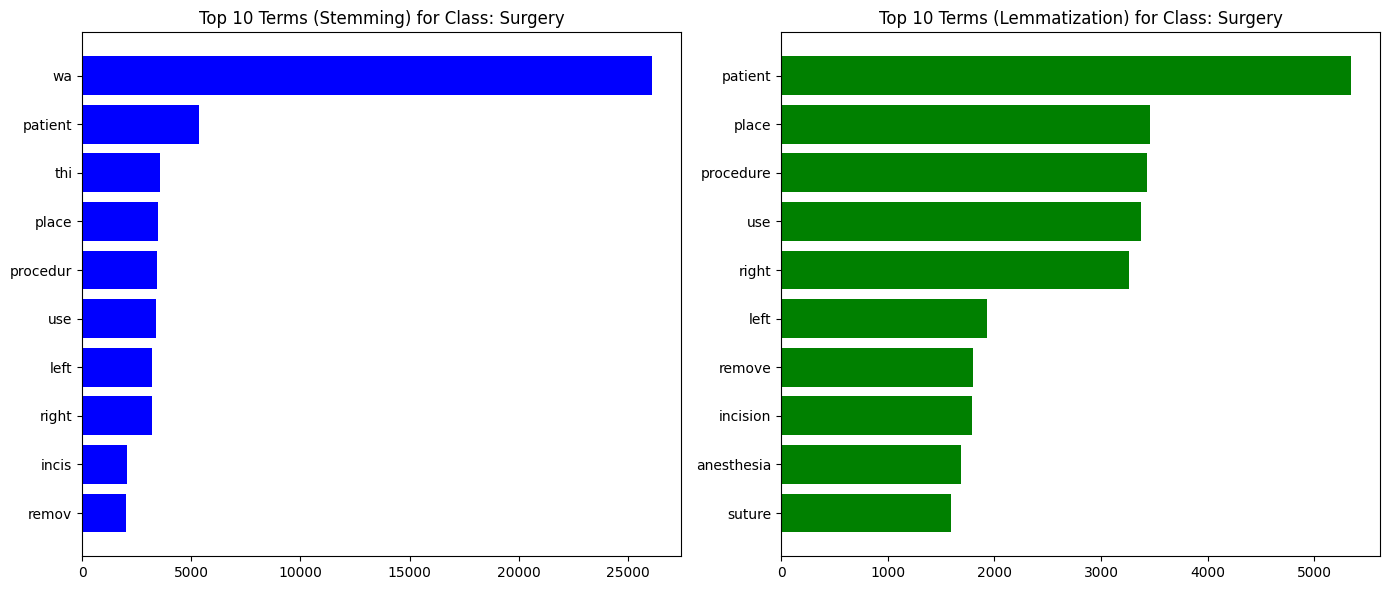

In [27]:
# Plot comparison for 'Surgery' class
plot_term_frequencies_comparison(comparison_with_stem, comparison_with_lemma, 'Surgery', top_n=10)

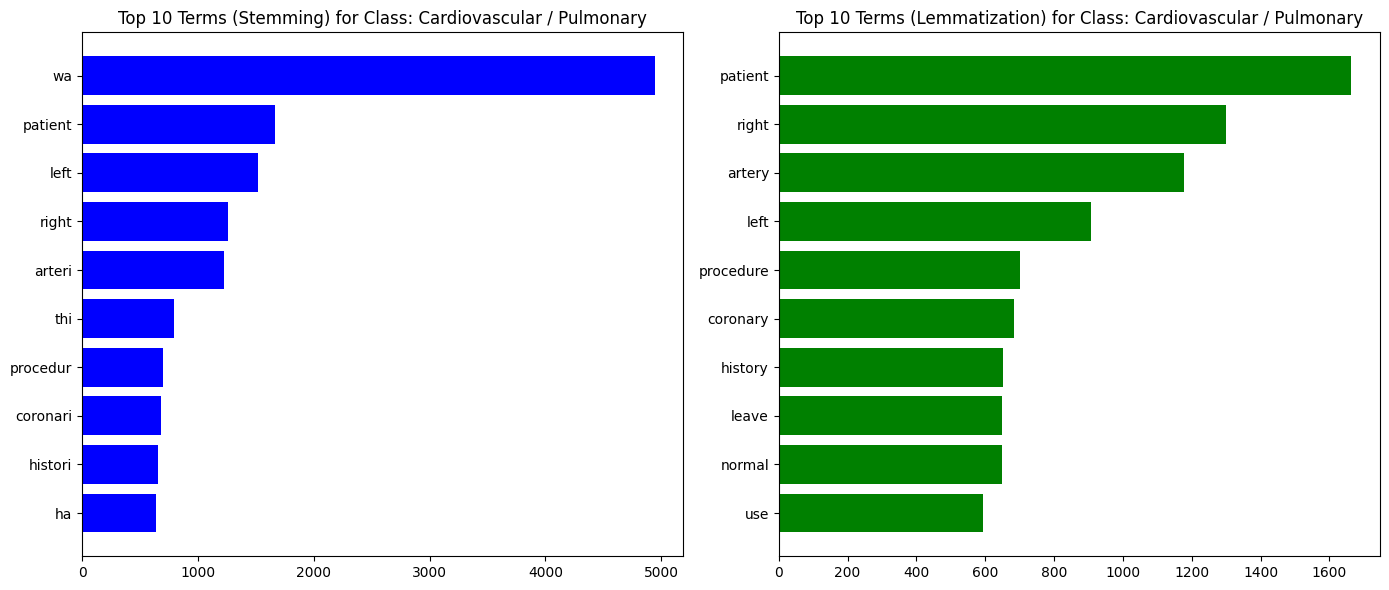

In [28]:
# Plot comparison for 'Cardiovascular / Pulmonary' class
plot_term_frequencies_comparison(comparison_with_stem, comparison_with_lemma, 'Cardiovascular / Pulmonary', top_n=10)

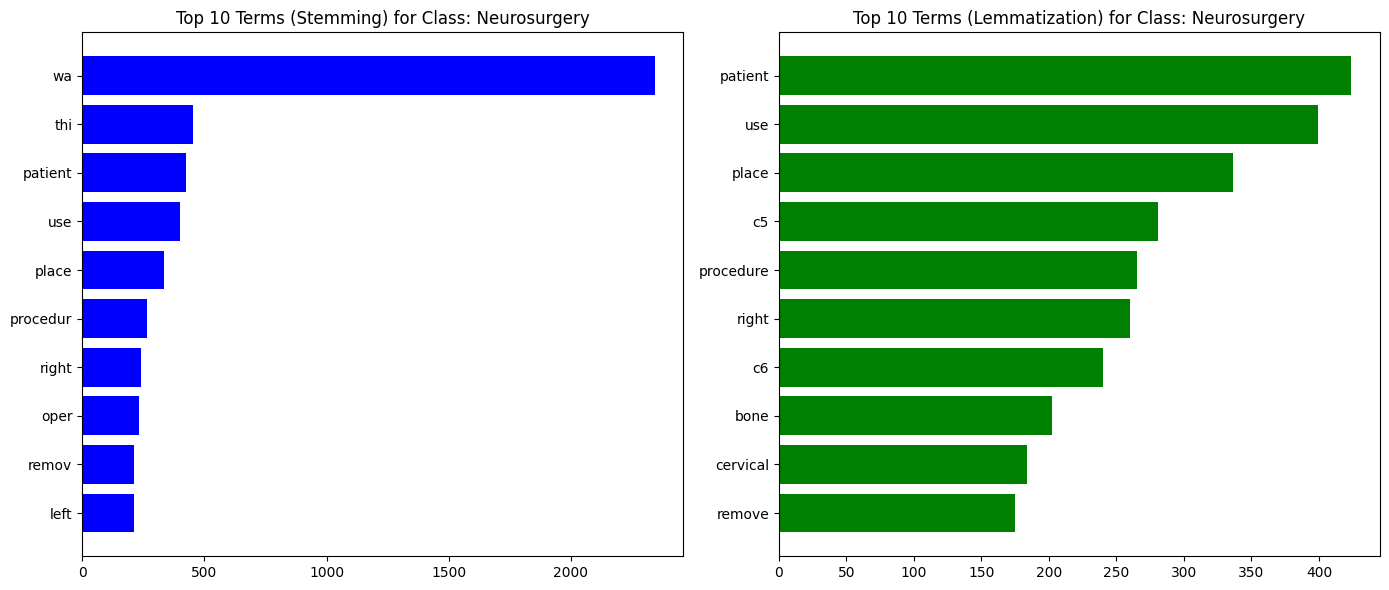

In [29]:
# Plot comparison for 'Neurosurgery' class
plot_term_frequencies_comparison(comparison_with_stem, comparison_with_lemma, 'Neurosurgery', top_n=10)

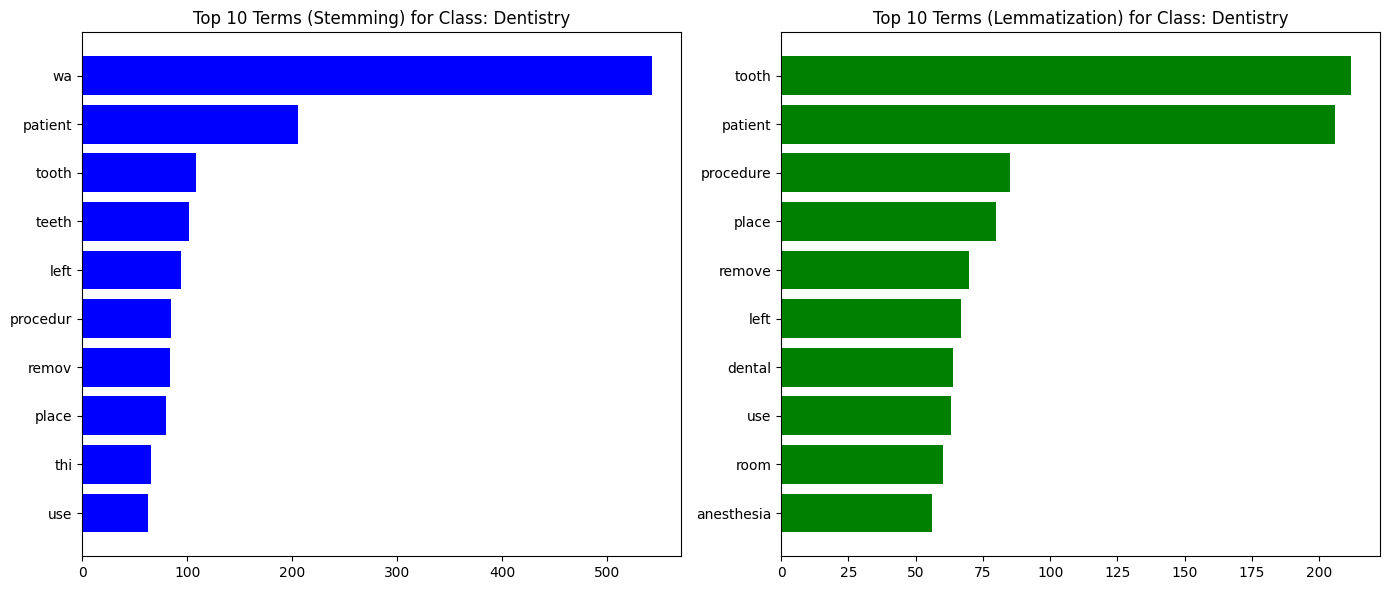

In [30]:
# Plot comparison for 'Dentistry' class
plot_term_frequencies_comparison(comparison_with_stem, comparison_with_lemma, 'Dentistry', top_n=10)

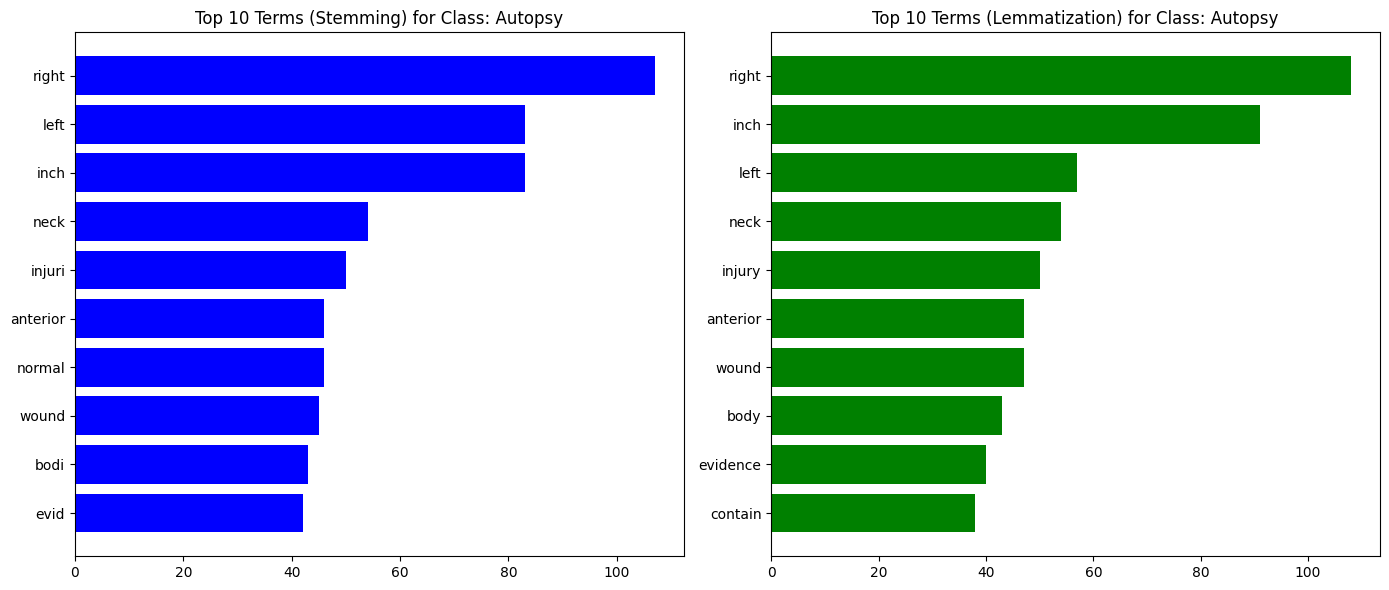

In [31]:
# Plot comparison for 'Autopsy' class
plot_term_frequencies_comparison(comparison_with_stem, comparison_with_lemma, 'Autopsy', top_n=10)

### *Findings*

- Differences in pipeline variants:
    - The lemmatized variant gives us more complete, linguistically valid words (eg, "procedure", "remove"), offering clearer and more interpretable terms, whereas the stemmed variant contains truncated forms (eg. "wa", "procedur"), leading to less clarity and potentially ambiguous terms. 
    - Additionally, stemming inflates the frequency of certain auxiliary verbs like "was" (stemmed to "wa").
    - As a result, lemmatization gives more relevant and interpretable medical terms across all classes. 

- Differences in term frequencies per class: 
    - Each class from the plotted subset of classes (e.g., Surgery, Cardiovascular/Pulmonary, Neurosurgery, Dentistry, and Autopsy) shows distinct top terms relevant to its domain. 
    - For example, in the Dentistry class, terms like "tooth" and "dental" are prominent, while in the Autopsy class, terms like "injury" and "wound" are more frequent. 
    - Based on these differences, we can infer that term distributions are context-specific across medical domains.